<a href="https://colab.research.google.com/github/Ananya45678/Machine-Learning-Codes/blob/main/ML_lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving wine_data.csv to wine_data.csv


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from matplotlib.colors import ListedColormap

**QUESTION 1.**

Write a function to calculate the entropy associated with your dataset. (If your dataset contains
only continuous numeric data for outcome (a regression problem), employ equal width binning and
divide your data into 4 bins. Each bin may be considered as a categorical data value. Write a function
for equal width binning).


In [5]:
def equal_width_binning(data, num_bins=4):
    bin_edges = np.linspace(data.min(), data.max(), num_bins + 1)
    binned_data = np.digitize(data, bin_edges, right=True)
    return binned_data

def calculate_entropy(data):
    unique_values, counts = np.unique(data, return_counts=True)
    probabilities = counts / counts.sum()
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

file_path = "wine_data.csv"
wine_data = pd.read_csv(file_path)

wine_data['proline_binned'] = equal_width_binning(wine_data['proline'])

dataset_entropy = calculate_entropy(wine_data['proline_binned'])

print(f"Entropy of the dataset (based on binned 'proline' values): {dataset_entropy:.4f}")

Entropy of the dataset (based on binned 'proline' values): 1.7505


**QUESTION 2.**

Calculate the Gini index value for your dataset.

In [7]:
def calculate_gini_index(data):
    unique_values, counts = np.unique(data, return_counts=True)
    probabilities = counts / counts.sum()
    gini_index = 1 - np.sum(probabilities ** 2)
    return gini_index

gini_index = calculate_gini_index(wine_data['proline_binned'])

print(f"Gini Index of the dataset (based on binned 'proline' values): {gini_index:.4f}")

Gini Index of the dataset (based on binned 'proline' values): 0.6713


**QUESTION 3.**

Write your own module for detecting the feature / attribute for the root note of a Decision Tree.
Use Information gain as the impurity measure for identifying the root node. Assume that the
features are categorical or could be converted to categorical by binning.

In [8]:
def equal_width_binning(data, num_bins=4):
    bin_edges = np.linspace(data.min(), data.max(), num_bins + 1)
    binned_data = np.digitize(data, bin_edges, right=True)
    return binned_data

def calculate_entropy(data):
    unique_values, counts = np.unique(data, return_counts=True)
    probabilities = counts / counts.sum()
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def information_gain(dataset, feature, target):
    total_entropy = calculate_entropy(dataset[target])
    unique_values, counts = np.unique(dataset[feature], return_counts=True)

    weighted_entropy = sum((counts[i] / len(dataset)) * calculate_entropy(dataset[dataset[feature] == unique_values[i]][target])
                           for i in range(len(unique_values)))
    return total_entropy - weighted_entropy

def find_best_root_node(dataset, target):
    features = dataset.columns.tolist()
    features.remove(target)

    for feature in features:
        if dataset[feature].dtype != 'object':
            dataset[feature] = equal_width_binning(dataset[feature])

    info_gains = {feature: information_gain(dataset, feature, target) for feature in features}

    best_feature = max(info_gains, key=info_gains.get)
    return best_feature, info_gains

if __name__ == "__main__":
    file_path = "wine_data.csv"
    wine_data = pd.read_csv(file_path)
    target_variable = 'proline'

    wine_data[target_variable] = equal_width_binning(wine_data[target_variable])

    best_root, info_gains = find_best_root_node(wine_data, target_variable)
    print("Best Root Node Feature:", best_root)
    print("Information Gain for each feature:", info_gains)

Best Root Node Feature: class
Information Gain for each feature: {'class': np.float64(0.6732549917999306), 'alcohol': np.float64(0.386625857050761), 'malic_acid': np.float64(0.12054185927072925), 'ash': np.float64(0.09021335907109052), 'alcalinity_of_ash': np.float64(0.207187091048342), 'magnesium': np.float64(0.21773401615023902), 'total_phenols': np.float64(0.27588454349718194), 'flavanoids': np.float64(0.3714100035699939), 'nonflavanoid_phenols': np.float64(0.16439520162704957), 'proanthocyanins': np.float64(0.16118697641870794), 'color_intensity': np.float64(0.18386950795258916), 'hue': np.float64(0.18656082753876158), 'OD280_OD315_of_diluted_wines': np.float64(0.26459060341639584)}


**QUESTION 4.**

If the feature is continuous valued for A3, use equal width or frequency binning for converting
the attribute to categorical valued. The binning type should be a parameter to the function built for
binning. Write your own function for the binning task. The number of bins to be created should also
be passed as a parameter to the function. Use function overloading to allow for usage of default
parameters if no parameters are passed.

In [9]:
def bin_data(data, num_bins=4, binning_type='width'):
    if binning_type == 'width':
        bin_edges = np.linspace(data.min(), data.max(), num_bins + 1)
    elif binning_type == 'frequency':
        bin_edges = np.percentile(data, np.linspace(0, 100, num_bins + 1))
    else:
        raise ValueError("Invalid binning type. Choose 'width' or 'frequency'.")

    binned_data = np.digitize(data, bin_edges, right=True)
    return binned_data

def calculate_entropy(data):
    unique_values, counts = np.unique(data, return_counts=True)
    probabilities = counts / counts.sum()
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def information_gain(dataset, feature, target):
    total_entropy = calculate_entropy(dataset[target])
    unique_values, counts = np.unique(dataset[feature], return_counts=True)

    weighted_entropy = sum((counts[i] / len(dataset)) * calculate_entropy(dataset[dataset[feature] == unique_values[i]][target])
                           for i in range(len(unique_values)))
    return total_entropy - weighted_entropy

def find_best_root_node(dataset, target, binning_type='width', num_bins=4):
    features = dataset.columns.tolist()
    features.remove(target)

    for feature in features:
        if dataset[feature].dtype != 'object':
            dataset[feature] = bin_data(dataset[feature], num_bins, binning_type)

    info_gains = {feature: information_gain(dataset, feature, target) for feature in features}

    best_feature = max(info_gains, key=info_gains.get)
    return best_feature, info_gains

if __name__ == "__main__":
    file_path = "wine_data.csv"
    wine_data = pd.read_csv(file_path)
    target_variable = 'proline'

    wine_data[target_variable] = bin_data(wine_data[target_variable])

    best_root, info_gains = find_best_root_node(wine_data, target_variable, binning_type='frequency', num_bins=5)
    print("Best Root Node Feature:", best_root)
    print("Information Gain for each feature:", info_gains)

Best Root Node Feature: class
Information Gain for each feature: {'class': np.float64(0.6732549917999306), 'alcohol': np.float64(0.39442782040610314), 'malic_acid': np.float64(0.18936584273750423), 'ash': np.float64(0.07256464238047866), 'alcalinity_of_ash': np.float64(0.2468785605029138), 'magnesium': np.float64(0.2921301196285049), 'total_phenols': np.float64(0.3174762878521795), 'flavanoids': np.float64(0.4103577551918478), 'nonflavanoid_phenols': np.float64(0.1858503397450968), 'proanthocyanins': np.float64(0.19878501499611212), 'color_intensity': np.float64(0.28096861242446747), 'hue': np.float64(0.2074665629727268), 'OD280_OD315_of_diluted_wines': np.float64(0.25994933501548334)}


**QUESTION 5.**

Expand the above functions to built your own Decision Tree module.

In [14]:
def bin_data(data, num_bins=4, binning_type='width'):
    if binning_type == 'width':
        bin_edges = np.linspace(data.min(), data.max(), num_bins + 1)
    elif binning_type == 'frequency':
        bin_edges = np.percentile(data, np.linspace(0, 100, num_bins + 1))
    else:
        raise ValueError("Invalid binning type. Choose 'width' or 'frequency'.")

    binned_data = np.digitize(data, bin_edges, right=True)
    return binned_data

def calculate_entropy(data):
    unique_values, counts = np.unique(data, return_counts=True)
    probabilities = counts / counts.sum()
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

def information_gain(dataset, feature, target):
    total_entropy = calculate_entropy(dataset[target])
    unique_values, counts = np.unique(dataset[feature], return_counts=True)

    weighted_entropy = sum((counts[i] / len(dataset)) * calculate_entropy(dataset[dataset[feature] == unique_values[i]][target])
                           for i in range(len(unique_values)))
    return total_entropy - weighted_entropy

def find_best_split(dataset, target):
    features = dataset.columns.tolist()
    features.remove(target)

    info_gains = {feature: information_gain(dataset, feature, target) for feature in features}
    best_feature = max(info_gains, key=info_gains.get)
    return best_feature

def build_decision_tree(dataset, target, depth=0, max_depth=5):
    if depth == max_depth or len(np.unique(dataset[target])) == 1:
        return dataset[target].mode()[0]

    best_feature = find_best_split(dataset, target)
    tree = {best_feature: {}}

    for value in np.unique(dataset[best_feature]):
        subset = dataset[dataset[best_feature] == value]
        tree[best_feature][value] = build_decision_tree(subset, target, depth + 1, max_depth)

    return tree

if __name__ == "__main__":
    file_path = "wine_data.csv"
    wine_data = pd.read_csv(file_path)
    target_variable = 'proline'

    wine_data[target_variable] = bin_data(wine_data[target_variable])

    decision_tree = build_decision_tree(wine_data, target_variable, max_depth=3)

    print("Generated Decision Tree:")
    print(decision_tree)

Generated Decision Tree:
{'color_intensity': {np.float64(1.28): np.int64(1), np.float64(1.74): np.int64(1), np.float64(1.9): np.int64(1), np.float64(1.95): np.int64(1), np.float64(2.0): np.int64(1), np.float64(2.06): np.int64(1), np.float64(2.08): np.int64(1), np.float64(2.12): np.int64(1), np.float64(2.15): np.int64(1), np.float64(2.2): np.int64(2), np.float64(2.3): np.int64(1), np.float64(2.4): np.int64(1), np.float64(2.45): np.int64(1), np.float64(2.5): {'alcohol': {np.float64(11.81): np.int64(1), np.float64(12.0): np.int64(0)}}, np.float64(2.57): np.int64(1), np.float64(2.6): {'alcohol': {np.float64(11.65): np.int64(1), np.float64(12.04): np.int64(1), np.float64(12.47): np.int64(2), np.float64(13.05): np.int64(1)}}, np.float64(2.62): np.int64(1), np.float64(2.65): {'alcohol': {np.float64(11.61): np.int64(2), np.float64(11.84): np.int64(1)}}, np.float64(2.7): np.int64(1), np.float64(2.76): np.int64(1), np.float64(2.8): {'alcohol': {np.float64(11.64): np.int64(2), np.float64(11.87): 

**QUESTION 6.**

Draw and visualize the decision tree constructed based on your data. (Refer above provided web
sources [1] & [2] for understanding and learning on how to visualize a DT).


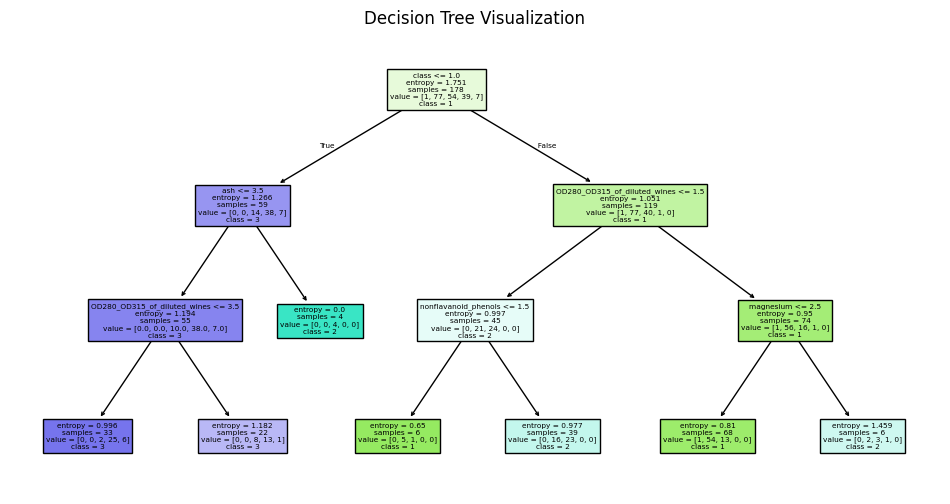

In [15]:
def bin_data(data, num_bins=4, binning_type='width'):
    if binning_type == 'width':
        bin_edges = np.linspace(data.min(), data.max(), num_bins + 1)
    elif binning_type == 'frequency':
        bin_edges = np.percentile(data, np.linspace(0, 100, num_bins + 1))
    else:
        raise ValueError("Invalid binning type. Choose 'width' or 'frequency'.")

    binned_data = np.digitize(data, bin_edges, right=True)
    return binned_data

def build_and_visualize_decision_tree(dataset, target, max_depth=3):
    features = dataset.columns.tolist()
    features.remove(target)
    for feature in features:
        if dataset[feature].dtype != 'object':
            dataset[feature] = bin_data(dataset[feature])

    X = dataset[features]
    y = dataset[target]
    tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42)
    tree_model.fit(X, y)

    plt.figure(figsize=(12, 6))
    plot_tree(tree_model, feature_names=features, class_names=np.unique(y).astype(str), filled=True)
    plt.title("Decision Tree Visualization")
    plt.show()

if __name__ == "__main__":
    file_path = "wine_data.csv"
    wine_data = pd.read_csv(file_path)
    target_variable = 'proline'

    wine_data[target_variable] = bin_data(wine_data[target_variable])

    build_and_visualize_decision_tree(wine_data, target_variable, max_depth=3)


**QUESTION 7.**

Use 2 features from your dataset for a classification problem. Visualize the decision boundary
created by your DT in the vector space. (Refer above provided web source [3] & [2] for
understanding and learning on how to draw decision boundary for a DT).

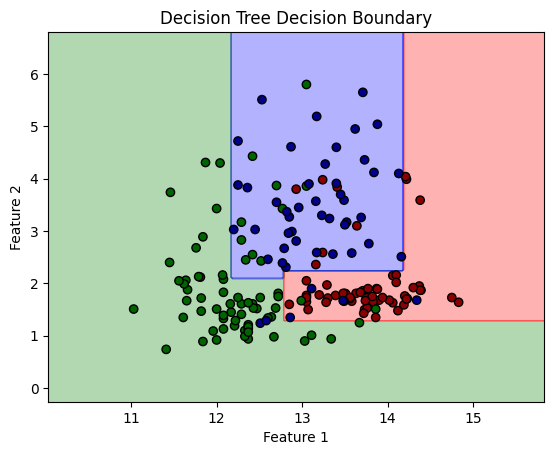

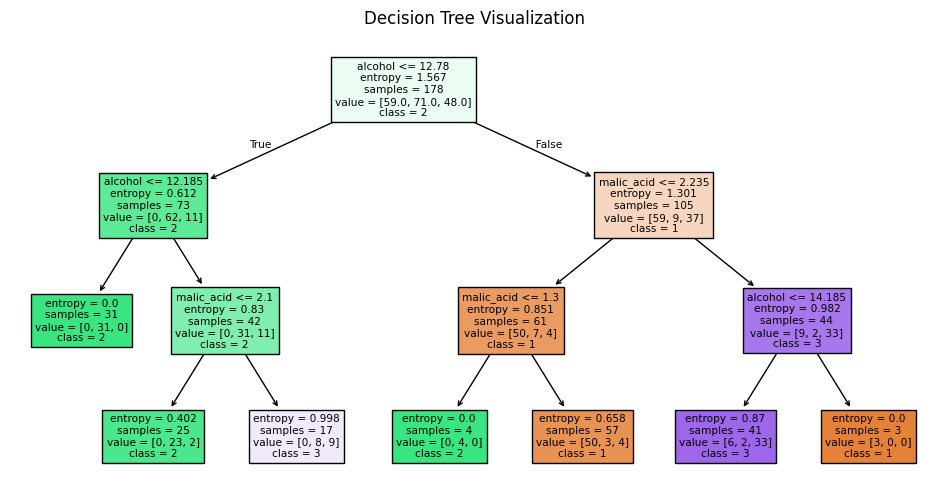

In [16]:
def bin_data(data, num_bins=4, binning_type='width'):
    if binning_type == 'width':
        bin_edges = np.linspace(data.min(), data.max(), num_bins + 1)
    elif binning_type == 'frequency':
        bin_edges = np.percentile(data, np.linspace(0, 100, num_bins + 1))
    else:
        raise ValueError("Invalid binning type. Choose 'width' or 'frequency'.")

    binned_data = np.digitize(data, bin_edges, right=True)
    return binned_data

def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['red', 'green', 'blue']))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=ListedColormap(['darkred', 'darkgreen', 'darkblue']))
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Tree Decision Boundary")
    plt.show()

def build_and_visualize_decision_tree(dataset, feature1, feature2, target, max_depth=3):
    X = dataset[[feature1, feature2]].values
    y = LabelEncoder().fit_transform(dataset[target])

    tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42)
    tree_model.fit(X, y)

    plot_decision_boundary(X, y, tree_model)

    plt.figure(figsize=(12, 6))
    plot_tree(tree_model, feature_names=[feature1, feature2], class_names=np.unique(dataset[target]).astype(str), filled=True)
    plt.title("Decision Tree Visualization")
    plt.show()

if __name__ == "__main__":
    file_path = "wine_data.csv"
    wine_data = pd.read_csv(file_path)
    target_variable = 'class'
    feature1, feature2 = 'alcohol', 'malic_acid'

    build_and_visualize_decision_tree(wine_data, feature1, feature2, target_variable, max_depth=3)